# Logistic Regression

## Import the relevant libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()


## Loading data

In [24]:
from google.colab import drive
drive.mount('/content/drive')

raw_data = pd.read_csv('/content/drive/MyDrive/Data science-BootCamp/2. Logistic Regresion/data/Example_bank_data.csv')
raw_data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,duration,y
0,0,117,no
1,1,274,yes
2,2,167,no
3,3,686,yes
4,4,157,no
...,...,...,...
513,513,204,no
514,514,806,yes
515,515,290,no
516,516,473,yes


In [26]:
# Replace all No entries with 0, and all Yes entries with 1
data = raw_data.copy()
data['y'] = data['y'].map({'yes': 1, 'no': 0})
data

,Unnamed: 0,duration,y
0,0,117,0
1,1,274,1
2,2,167,0
3,3,686,1
4,4,157,0
...,...,...,...
513,513,204,0
514,514,806,1
515,515,290,0
516,516,473,1


## Decleare the dependent and the independent variable

In [27]:
# Create the dependent and independent variables
y = data['y']
x1 = data['duration']

## Plot a logistic regression curve

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


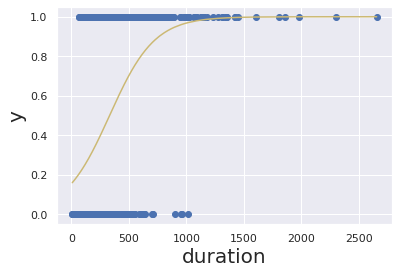

In [32]:
x = sm.add_constant(x1)
# Creating a logit regression 
reg_log = sm.Logit(y,x)
# Fitting the regression
results_log = reg_log.fit()
results_log.predict()

# Creating a logit function, depending on the input and coefficients
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

# Sorting the y and x, so we can plot the curve
f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))
plt.scatter(x1,y,color='C0')
plt.xlabel('duration', fontsize = 20)
plt.ylabel('y', fontsize = 20)
# Plotting the curve
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()